In [35]:
import json
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import re
import pandas as pd
import itertools
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import spacy
import nltk
from spacy.lang.de.stop_words import STOP_WORDS
nlp = spacy.load("de_core_news_sm")

In [2]:
with open("articles.json", "r") as f:
    articles = json.load(f)

In [3]:
articles

[{'article_url': 'https://www.heise.de/news/Telekom-und-Apple-starten-Augmented-Reality-Innovationsprogramm-6147126.html',
  'number_comments': 0,
  'date': '07-26-2021, 16:01',
  'brandig': ['Mac & i'],
  'related_topics': ['5G',
   'Apple',
   'Augmented Reality',
   'Deutsche Telekom',
   'Innovation',
   'iOS',
   'iPhone',
   'Mobilfunk',
   'Startups',
   'Wettbewerb'],
  'authors': ['Ben Schwan'],
  'heading': 'Telekom und Apple starten Augmented-Reality-Innovationsprogramm',
  'lead': 'Im Rahmen des Start-up-Inkubators "Hubraum" können sich Entwickler in sechs Kategorien bewerben, um Apples AR-Technik mit 5G und Co. zu kombinieren.',
  'atricle_text': 'Die Deutsche Telekom AG hat zusammen mit ihrer US-Tochter T-Mobile sowie Apple ein Innovationsprogramm für Augmented Reality (AR) aufgelegt. Die Kampagne läuft im Rahmen des Telekom-Inkubators Hubraum mit Sitz in Deutschland und ist international angelegt. Bewerbungen sind noch bis zum 4. August möglich, danach wird es für die in

# Zewck des Notebooks

Dieses Notebook dient alr grundsätzliche Dataexploration. Die einzelnen Merkmale eines Artikel werden statistisch analysiert und graphisch aufbereitet. Zu Beginn jedes Merkmales werden grundsätzliche Erkennisse textuell erläutert, im weiteren Verlauf befinden sich der Code, Tabellen und Grafiken.

# Kommentare
Im Schnitt umfasst ein Artikel 134 Kommentare. Die meist diskutierten Artikel haben sogar über 3000 Kommentare, wobei sich die Top drei alle auf das Thema "Tempolimit" fokussieren und generell scheint das Thema "Auto" eine sehr große Rolle zu spielen.

In [4]:
number_comments_list = [article["number_comments"] for article in articles]
number_comments_np = np.array(number_comments_list)

## Verteilung

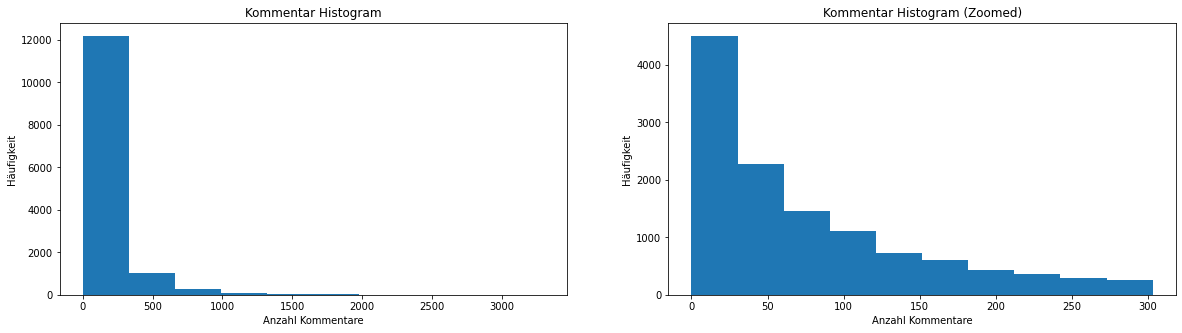

In [5]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.hist(number_comments_np)
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram')
plt.subplot(1, 2, 2)
plt.hist(np.sort(number_comments_np)[:12000])
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram (Zoomed)')
plt.show(f)

In [6]:
np.mean(number_comments_np)

134.31538405106008

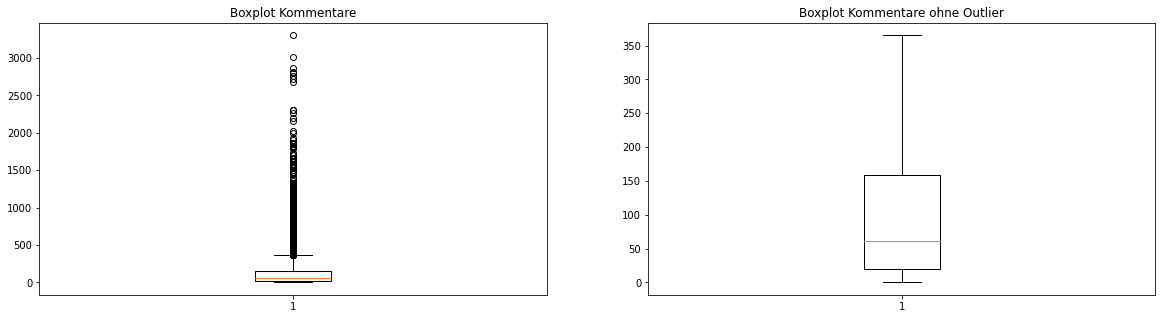

In [7]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.boxplot(number_comments_np)
plt.title('Boxplot Kommentare')
plt.subplot(1, 2, 2)
plt.boxplot(number_comments_np,showfliers=False)
plt.title('Boxplot Kommentare ohne Outlier')
plt.show(f)

## Meist diskutierte Artikel 🚗

In [10]:
for idx in reversed(np.argsort(number_comments_np)[-10:]):
    print(f"Anzahl Kommentare {articles[idx]['number_comments']}")
    print(f"Überschrift \"{articles[idx]['heading']}\"")
    print(f"Datum {articles[idx]['date']}")
    print()

Anzahl Kommentare 3302
Überschrift "Bundestag lehnt Tempolimit 130 auf Autobahnen und Nulltarif im ÖPNV ab"
Datum 10-18-2019, 07:34

Anzahl Kommentare 3007
Überschrift "Tempolimit: Verbände fordern Tempolimit auf Autobahnen und Tempo 30 innerorts"
Datum 02-12-2020, 14:06

Anzahl Kommentare 2870
Überschrift "Kommentar: Tempolimit "gegen jeden Menschenverstand"? So, so ..."
Datum 01-25-2019, 06:20

Anzahl Kommentare 2813
Überschrift "Kommentar: Der Mercedes EQC ist eine rollende Provokation"
Datum 09-07-2018, 07:16

Anzahl Kommentare 2803
Überschrift "BMW: Europäer wollen keine Elektroautos kaufen"
Datum 06-29-2019, 18:20

Anzahl Kommentare 2765
Überschrift "Klimawandel: Neue Versprechen nach Thunbergs Wutrede auf Klimagipfel"
Datum 09-24-2019, 08:45

Anzahl Kommentare 2724
Überschrift "ADAC findet Elektroautos oft überraschend günstig"
Datum 11-02-2018, 08:13

Anzahl Kommentare 2681
Überschrift "Klartext: Das teure Elektroauto"
Datum 01-22-2020, 07:00

Anzahl Kommentare 2311
Überschrift

### Artikel ohne Kommentare

In [9]:
np.count_nonzero(number_comments_np==0)

457

# Datum
<b>Veröffenlichung nach Jahren</b><br>
Seit 2003 wurden in der Rubrik Wirtschaft Artikel veröffentlicht, allerdings erst ab 2017 mit erhöhter Häufigkeit (> 2000). Seit 2017 steigt die Anzahl der publizierten Artikel (2021 bei bereits der Hälfte des Jahres mehr Artikel wie im Jahre 2017).<br>
<b>Veröffenlichung nach Monaten</b><br>
Im Juli werden am meisten Artikel veröffenlticht (ca. 200 mehr als der Durchschnitt).<br>
Im Februar werden am wenigsten Artikel veröffenlticht (ca. 170 weniger als der Durchschnitt).<br>
<b>Veröffenlichung nach Stunden</b><br>
Es werden rund um die Uhr Artikel veröffentlicht, für gewöhnlich aber zwischen 6 und 19 Uhr. Um 10 Uhr werden am meisten Artikel veröffenlicht.

In [11]:
number_comments_list = [article["number_comments"] for article in articles]
number_comments_np = np.array(number_comments_list)

## Artikel pro Jar

In [12]:
articles_year = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    articles_year[date.year] = articles_year.get(date.year,0) + 1

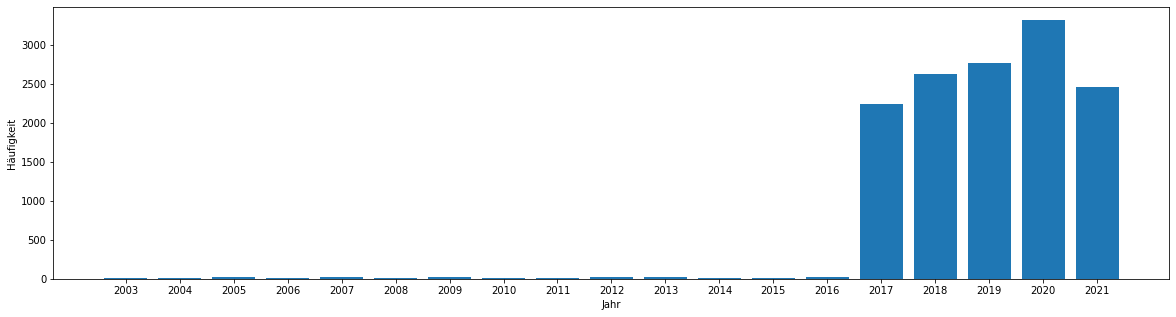

In [13]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_year)), list(articles_year.values()), align='center')
plt.xticks(range(len(articles_year)), list(articles_year.keys()))
plt.xlabel('Jahr')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

In [15]:
articles_year

{2021: 2465,
 2020: 3323,
 2019: 2775,
 2018: 2628,
 2017: 2239,
 2016: 23,
 2015: 7,
 2014: 11,
 2013: 18,
 2012: 18,
 2011: 6,
 2010: 10,
 2009: 18,
 2008: 12,
 2007: 22,
 2006: 9,
 2005: 26,
 2004: 16,
 2003: 5}

## Artikel nach Monat (ohne 2021)

In [18]:
articles_mo = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    if date.year != 2021:
        articles_mo[date.strftime("%B")] = articles_mo.get(date.strftime("%B"),0) + 1

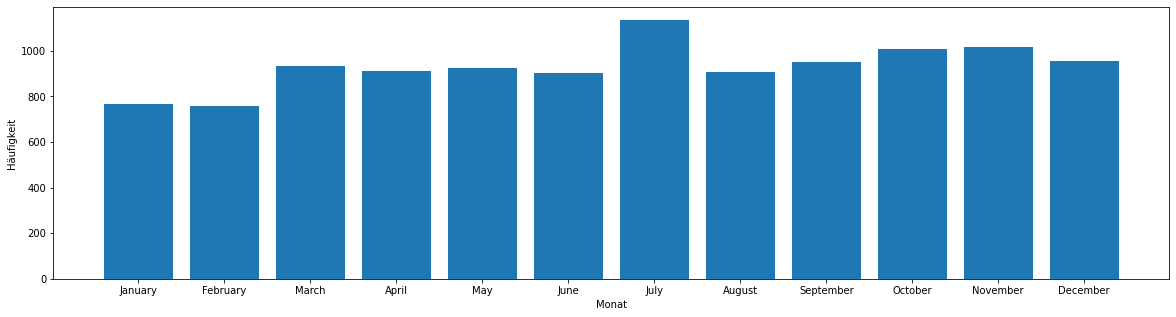

In [19]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_mo)), list(articles_mo.values()), align='center')
plt.xticks(range(len(articles_mo)), list(articles_mo.keys()))
plt.xlabel('Monat')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

In [20]:
articles_mo["July"] - np.mean(list(articles_mo.values()))

204.5

In [21]:
np.mean(list(articles_mo.values())) - articles_mo["February"]

173.5

## Artikel nach Stunde (ohne 2021)

In [16]:
articles_hour = {}
for article in articles:
    date = article["date"]
    date = datetime.strptime(date, "%m-%d-%Y, %H:%M")
    if date.year != 2021:
        articles_hour[date.hour] = articles_hour.get(date.hour,0) + 1
articles_hour = {key: value for (key, value) in sorted(articles_hour.items(), key=lambda x: x[0], reverse=True)}

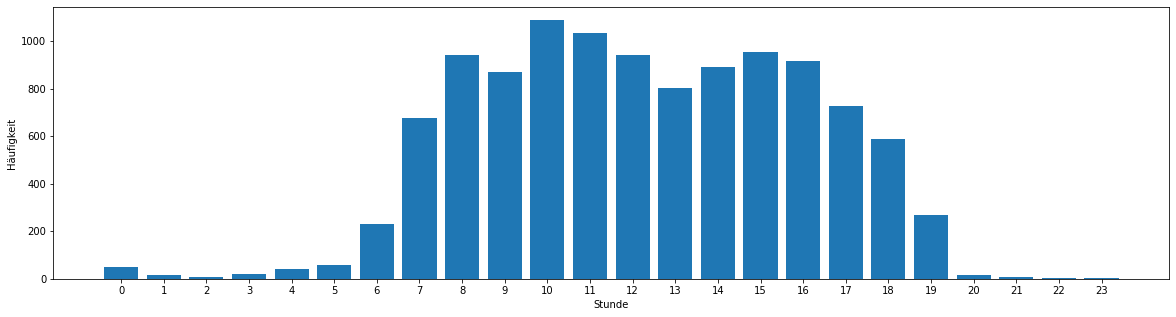

In [17]:
plt.figure(figsize=(20,5))
plt.bar(range(len(articles_hour)), list(articles_hour.values()), align='center')
plt.xticks(range(len(articles_hour)), list(articles_hour.keys()))
plt.xlabel('Stunde')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

# Branding/Tag

Es gibt insgesamt 10 verschiedene Tags. Ein Tag gibt das jeweilige Heise-Magazin an, in dem der Artikel erschienen ist. Folglich hat ein Artikel entweder ein oder gar kein Tag. Nur ca. 17% (2715) aller Artikel besitzen ein Tag. Die Tags "Mac & i" und "Autos" treten mit 1012 am häufigsten auf, während das Tag "Telepolis" nur einmal auftritt.

In [22]:
tags = [tag for article in articles for tag in article["brandig"]]

In [23]:
print(len(set(tags)))
set(tags)

10


{'Autos',
 'Developer',
 'MIT Technology Review',
 'Mac & i',
 'Make',
 'Security',
 'Telepolis',
 "c't Fotografie",
 "c't Magazin",
 'iX Magazin'}

In [24]:
print(f"Anzahl Artikel ohne Tags: {len(articles) - len(tags)}")
print(f"Anzahl Artikel mit Tags: {len(tags)}")
print(f"Anteil Artikel mit Tags: {len(tags)/(len(articles) + len(tags))}")

Anzahl Artikel ohne Tags: 10916
Anzahl Artikel mit Tags: 2715
Anteil Artikel mit Tags: 0.16609568090052612


In [25]:
tag_frequencies = {}
for tag in tags:
    tag_frequencies[tag] = tag_frequencies.get(tag,0)+1
tag_frequencies = {key: value for (key, value) in sorted(tag_frequencies.items(), key=lambda x: x[1], reverse=True)}

In [26]:
tag_frequencies

{'Mac & i': 1012,
 'Autos': 1012,
 'MIT Technology Review': 288,
 'iX Magazin': 197,
 "c't Magazin": 93,
 'Developer': 57,
 'Security': 37,
 "c't Fotografie": 12,
 'Make': 6,
 'Telepolis': 1}

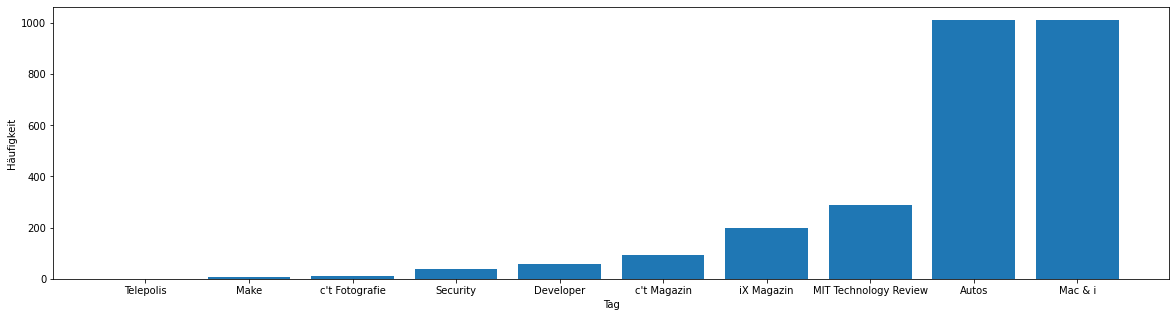

In [27]:
plt.figure(figsize=(20,5))
plt.bar(range(len(tag_frequencies)), list(tag_frequencies.values()), align='center')
plt.xticks(range(len(tag_frequencies)), list(tag_frequencies.keys()))
plt.xlabel('Tag')
plt.ylabel('Häufigkeit')
plt.gca().invert_xaxis()
plt.show()

# Verwandte Themen
Ein Artikel kann mehrere verwandte Themen oder auch gar keine haben. Bei ca. 7,5 % fehlt der Eintrag. Es gibt insgesamt 913 verschiedene verwandte Themen, wobei "Elektromobilität", "Elektroauto" und "Apple" die häufigsten Themen sind. Dies wiederspiegelt auch die vorherige Analyse der Tags (häufigste Tags "Mac & i" und "Autos"). Auch das Coronavirus wird sehr häufig thematisiert und ist bereits das fünft häufigste Thema, obwohl dieses Thema erst Beginn 2020 themantisiert wurde.<br>
<b>Veränderung der verwanten Theman nach Jahren</b><br>
Man erkennt sehr gut, dass die Themen Elektromobilität, Elektoauto, Apple und Geschäftszahlen (im Jahr 2021 auf Platz 7) in allen Jahren eine sehr große Bedeutung gespielt haben. Zusätzlich gibt es weiteren Themen die jeweils in verschiedenen Jahren eine Rolle gespielt haben:

    - 2017 EU
    - 2018 Abgas-Skandal
    - 2019 Mobilfunk
    - 2020 Coronavirus
    - 2021 Coronavirus, Klimawandel

In [28]:
related_topics = [article["related_topics"] for article in articles]

In [29]:
counter=0
# Wie viele leere Elemente sind in der Liste? 
for topic in related_topics:
    if not topic:
        counter += 1
print('Anzahl der Einträge insgesammt:',len(related_topics) ,'Anzahl der leeren Einträge:',counter)   

Anzahl der Einträge insgesammt: 13631 Anzahl der leeren Einträge: 1043


In [30]:
related_topics_freq = {}
for topics in related_topics:
    for topic in topics:
        related_topics_freq[topic] = related_topics_freq.get(topic, 0) + 1

In [31]:
topics_df = pd.DataFrame(related_topics_freq.items(),columns=['topic_name','frequency'])
topics_df = topics_df.sort_values(by='frequency',ascending=False)
topics_df["rel_frequency_article"] = topics_df["frequency"]/len(articles)
topics_df

topic_name  frequency  rel_frequency_article
25   Elektromobilität       1562               0.114592
24        Elektroauto       1299               0.095297
1               Apple       1203               0.088255
37    Geschäftszahlen        747               0.054802
44        Coronavirus        723               0.053041
..                ...        ...                    ...
802           Groupon          1               0.000073
688              IPv6          1               0.000073
513     Wahlmaschinen          1               0.000073
805             DeNIC          1               0.000073
912           Web 2.0          1               0.000073

[913 rows x 3 columns]

<AxesSubplot:xlabel='topic_name'>

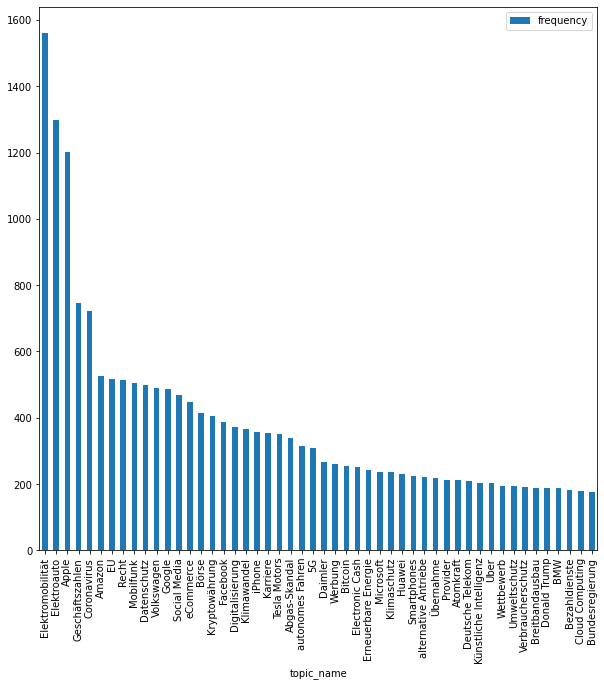

In [32]:
topics_df.head(50).plot(kind='bar',x = "topic_name",y='frequency',figsize=(10,10))

## Veränderung der Topics in verschiedenen Jahren

In [4]:
year_topic = [[datetime.strptime(article["date"], "%m-%d-%Y, %H:%M").year, topic] for article in articles for topic in article["related_topics"]]
year_topic = pd.DataFrame(year_topic, columns=["year","topic"])

In [5]:
year_topic_freq_df = year_topic.groupby(['year','topic']).size().groupby('year', group_keys=False).nlargest(5).reset_index(name="frequency")
# Nur die Jahre 2017 bis 2021
year_topic_freq_df = year_topic_freq_df[year_topic_freq_df.year.isin(range(2017,2022))]

In [6]:
year_topic_freq_pivot = year_topic_freq_df.pivot(index="year",columns="topic", values="frequency")
#Sortieren nach NaN Werten, um besseren Barplot zu erhalten
year_topic_freq_pivot = year_topic_freq_pivot[year_topic_freq_pivot.isnull().sum().sort_values(ascending=True).index]

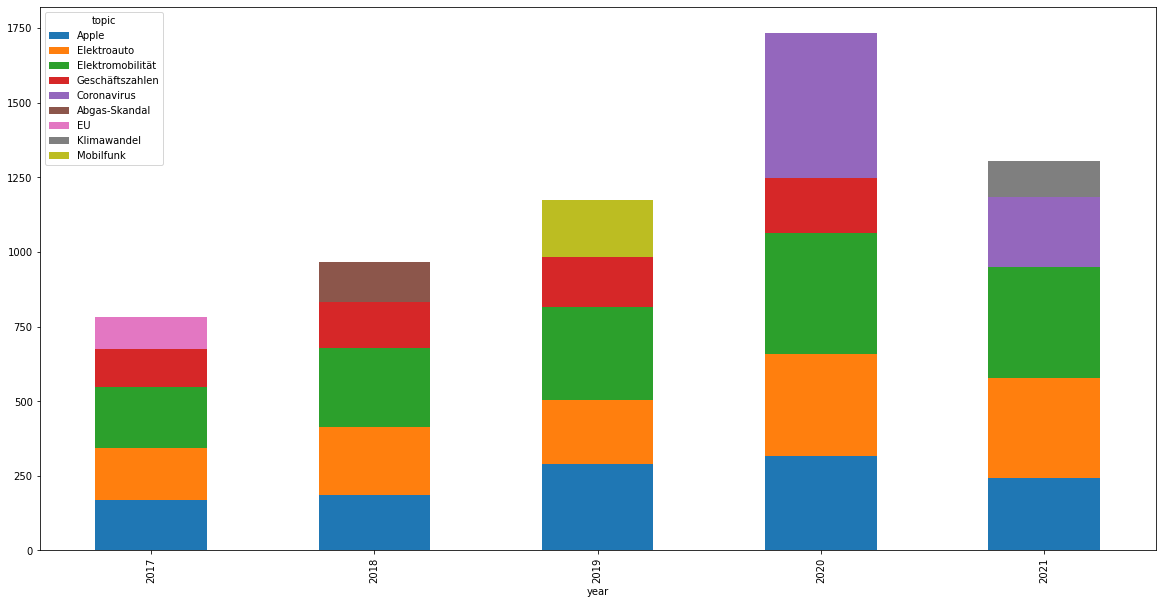

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
#order = ['Elektromobilität','Elektroauto', 'Apple','Geschäftszahlen','EU','Abgas-Skandal', 'Mobilfunk', 'Coronavirus', 'Klimawandel']
year_topic_freq_pivot.plot.bar(stacked=True, ax=ax)
plt.show()

# Autoren

In den meisten Fällen stammt ein Artikel von nur einem Autor. Neben der dpa (4665) sind Andreas Wilkens(1556), Stefan Krempl(845) und Ben Schwan(712)	die Autoren, die am meisten Artikel geschrieben haben. Wobei Andreas Wilkens (Elektro-)Autos, Stefan Krempl EU und Datenschutz und Ben Schwan Apple thematisiert. Autorenpaare treten relativ selten auf. Das Autorenpaar mit den meisten Artikel (ohne dpa also zweit Autor) sind Angela Froitzheim und Ulf J. Froitzheim mit lediglich 24 Artikeln 

## clean
Manchmal durch "und" oder "," und nicht als neues Listenelement

In [10]:
authors_article = [article["authors"] for article in articles]

In [11]:
for i, authors in enumerate(authors_article):
    tmp_elem = []
    for author_s in authors:
        tmp_elem += re.split(',| und |;|/', author_s)
        
    authors_article[i] = [author.strip() for author in tmp_elem]

In [12]:
for authors in authors_article:
    for i, author in enumerate(authors):
        if '' == author:
            authors.remove(author)
        if '-Korrespondenten' == author:
            authors.remove(author)
        if '. Felix Frieler' == author:
            authors[i] = 'Felix Frieler'
        if 'Grundhoff' == author:
            authors[i] = 'Stefan Grundhoff'
        if 'Martin Fischer (translation by Fabian A. Scherschel)' == author:
            authors[i] = 'Martin Fischer'
            authors.append("Fabian A. Scherschel")
        if author.startswith("Dr."):
            authors[i] = author.split("Dr.")[1][1:]
        if "Stefan 'Krempl" == author:
             authors[i] = 'Stefan Krempl'
        if 'Wolf von Dewitz (dpa)' == author:
            authors[i] = 'Wolf von Dewitz'
        if 'Veronika Szentpetery' == author or 'Veronika Szentpetery-Kessler' == author:
            authors[i] = 'Veronika Szentpétery-Kessler'
        if 'Übersetzung: Ben Schwan' == author:
            authors[i] = 'Ben Schwan'
        if 'press-inform' == author:
            authors[i] = 'pressinform'
            
        material_dpa = ['Mit Material von dpa', 'mit Material von dpa','mt Material von dpa']
        if author in material_dpa:
             authors[i] = 'mit Material der dpa'
        
        dpa = ['den dpa-Korrespondentinnen', 'dpa-AFX', 'dpa-Korrespondenten']
        if author in dpa:
            authors[i] = 'dpa'          

##  Durchschnittliche Anzahl Autoren pro Artikel

In [13]:
authors_count_per_article = np.array([len(authors) for authors in authors_article])
np.mean(authors_count_per_article)

1.085687036901181

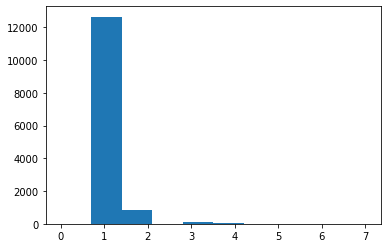

In [18]:
plt.hist(authors_count_per_article)
plt.show()

## Meiste Autoren pro Artikel

In [19]:
print(np.max(authors_count_per_article))
print(authors_article[np.argmax(authors_count_per_article)])

7
['Volker Briegleb', 'Sven Hansen', 'Jan-Keno Janssen', 'Nico Jurran', 'Ulrike Kuhlmann', 'Florian Müssig', 'Stefan Porteck']


## Artikel ohne angegebenen Autor

In [20]:
np.count_nonzero(authors_count_per_article==0)

4

## Häufigste Autoren

In [21]:
authors = [author for authors in authors_article for author in authors]
authors_df = pd.DataFrame(authors,columns=['author_name'])

In [22]:
authors_df = authors_df.groupby(['author_name']).size()
authors_df = pd.DataFrame(authors_df).reset_index()
authors_df = authors_df.rename(columns={0:"number_articles"})
authors_df = authors_df.sort_values(by='number_articles',ascending=False)
authors_df.head(10)

author_name  number_articles
610                dpa             4665
25     Andreas Wilkens             1556
505      Stefan Krempl              845
58          Ben Schwan              712
584    Volker Briegleb              560
50     Axel Kannenberg              508
427       Oliver Bünte              473
138  Daniel AJ Sokolov              354
375     Martin Holland              311
343         Leo Becker              249

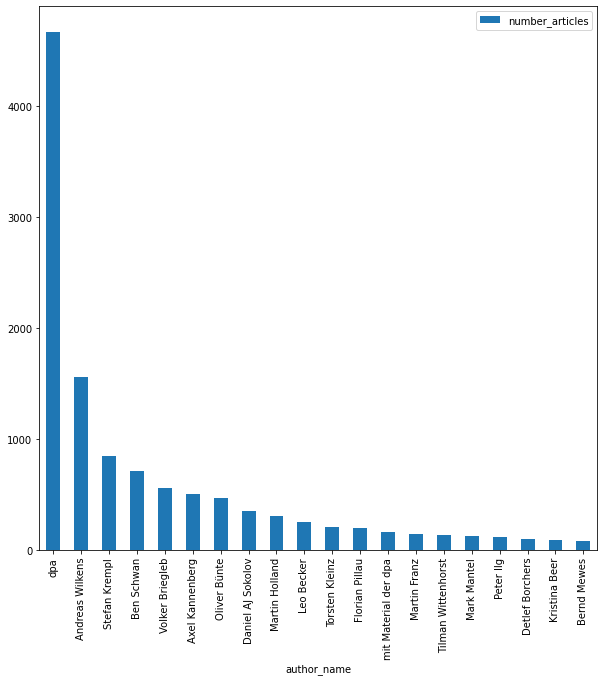

In [23]:
authors_df.head(20).plot(kind='bar',x = "author_name",y='number_articles',figsize=(10,10))
plt.show()

## Themen der häufigsten Autoren

In [29]:
author_topics = []
for authors , article in zip(authors_article,articles):
    if "dpa" in authors:
        author_topics += article["related_topics"]

print("dpa")
pd.DataFrame(author_topics).groupby([0]).size().to_frame().rename(columns={0:"topic_frequency"}).sort_values(by="topic_frequency",ascending=False).head(5)

dpa


topic_frequency
0                                
Elektromobilität              475
Geschäftszahlen               372
Elektroauto                   365
Coronavirus                   316
Volkswagen                    250

In [25]:
author_topics = []
for authors , article in zip(authors_article,articles):
    if "Andreas Wilkens" in authors:
        author_topics += article["related_topics"]

print("Andreas Wilkens")
pd.DataFrame(author_topics).groupby([0]).size().to_frame().rename(columns={0:"topic_frequency"}).sort_values(by="topic_frequency",ascending=False).head(5)

Andreas Wilkens


topic_frequency
0                                
Elektromobilität              604
Elektroauto                   540
Volkswagen                    126
Atomkraft                     113
Tesla Motors                   95

In [26]:
author_topics = []
for authors , article in zip(authors_article,articles):
    if "Stefan Krempl" in authors:
        author_topics += article["related_topics"]
print("Stefan Krempl")        
pd.DataFrame(author_topics).groupby([0]).size().to_frame().rename(columns={0:"topic_frequency"}).sort_values(by="topic_frequency",ascending=False).head(5)

Stefan Krempl


topic_frequency
0                                
EU                            148
Datenschutz                   108
Digitalisierung                66
Elektromobilität               57
Klimawandel                    53

In [27]:
author_topics = []
for authors , article in zip(authors_article,articles):
    if "Ben Schwan" in authors:
        author_topics += article["related_topics"]
print("Ben Schwan")       
pd.DataFrame(author_topics).groupby([0]).size().to_frame().rename(columns={0:"topic_frequency"}).sort_values(by="topic_frequency",ascending=False).head(5)

Ben Schwan


topic_frequency
0                         
Apple                  690
iPhone                 280
iOS                     92
Tim Cook                91
App Store               87

## Häufige Autoren-Paare

In [30]:
author_pairs = []
for authors in authors_article:
    author_pairs += list(itertools.combinations(authors, 2))

In [31]:
author_pairs_df = pd.DataFrame(np.ones(len(author_pairs)))
author_pairs_df["author_pair"] = author_pairs

In [32]:
author_pairs_df = author_pairs_df.groupby(["author_pair"]).count()
author_pairs_df = author_pairs_df.reset_index()
author_pairs_df = author_pairs_df.rename(columns={0:"number_author_pair"})
author_pairs_df = author_pairs_df.sort_values(by='number_author_pair',ascending=False)
author_pairs_df.head(10)

author_pair  number_author_pair
202   (Florian Pillau, mit Material der dpa)                  51
33                     (Andreas Hoenig, dpa)                  43
232                  (Hannes Breustedt, dpa)                  37
187                     (Erich Reimann, dpa)                  31
250                     (Jan Petermann, dpa)                  28
46    (Angela Froitzheim, Ulf J. Froitzheim)                  24
102                    (Carsten Hoefer, dpa)                  23
68   (Axel Kannenberg, mit Material der dpa)                  23
355     (Martin Franz, mit Material der dpa)                  20
358      (Martin LaMonica, Narayanan Suresh)                  20

# heading
Eine Überschrift ist im Schnitt 7,4 Zeichen lang. Die längste Überschrift umfasst 18 Zeichen. Die häufigsten Wörter als auch Lemmas sind Apple, US (US-amerkanischen (lemma)) und EU.

In [39]:
headings = [article["heading"] for article in articles]
headings_concat = ' '.join(headings)

In [40]:
# remove stopwords, and numbers, and anything that's not alphanumeric or underscore
heading_tokens = nltk.word_tokenize(headings_concat)
headings_clean = " ".join([w for w in heading_tokens if not w.lower() in STOP_WORDS])
headings_clean = re.sub(r'[^\w]', ' ', headings_clean)
#headings_clean = re.sub(r'[0-9]+', '', headings_clean)

## Durchschnittliche Länge

Durschnittliche Länge der Headings: 7.358814467023696
Längste Heading: 18 
 Missing Link: Agil leben im digitalen Kapitalismus. Teil 2 - Mit dem Bedingungslosen Grundeinkommen den nächsten Sprint schaffen
Kürzeste Heading: 1 
 SUSE-Börsengang


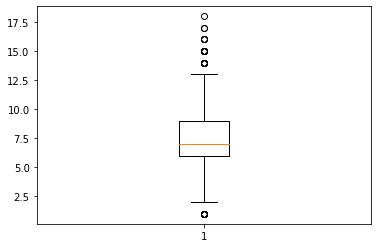

In [66]:
heading_lens = []
for heading in headings:
    heading_len = len(heading.split())
    heading_lens.append(heading_len)
    
print('Durschnittliche Länge der Headings:',np.mean(heading_lens))
print('Längste Heading:',np.max(heading_lens),"\n", headings[np.argmax(heading_lens)])
print('Kürzeste Heading:',np.min(heading_lens),"\n", headings[np.argmin(heading_lens)])
plt.boxplot(heading_lens)
plt.show()

## Häufigste Wörter

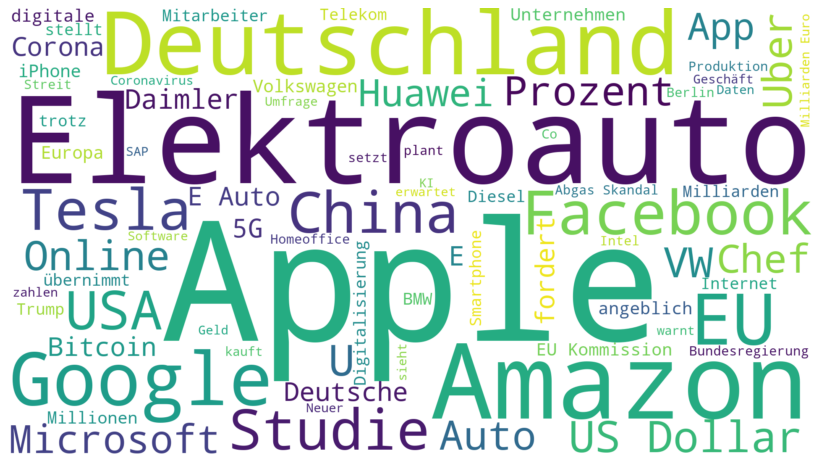

In [75]:
STOPWORDS.update(STOP_WORDS)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(headings_clean)

plt.figure(figsize=(13, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [53]:
heading_words_list = headings_clean.split() 
heading_words_df = pd.DataFrame(heading_words_list,columns=['words'])
df = heading_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
sorted_df.head(15)

number_words
words                     
Apple                  871
US                     659
EU                     522
E                      506
Amazon                 416
Elektroautos           354
Deutschland            351
Millionen              333
Google                 322
Milliarden             319
Chef                   304
Dollar                 299
Tesla                  282
Euro                   272
Facebook               271

<Figure size 2500x1500 with 0 Axes>

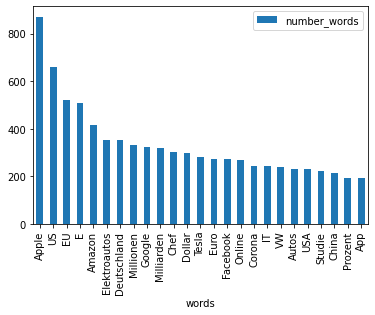

In [44]:
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()

## Häufigste Lemmas

In [54]:
headings_clean_spacy = nlp(headings_clean)
headings_clean_lemmas = " ".join([token.lemma_ for token in headings_clean_spacy])

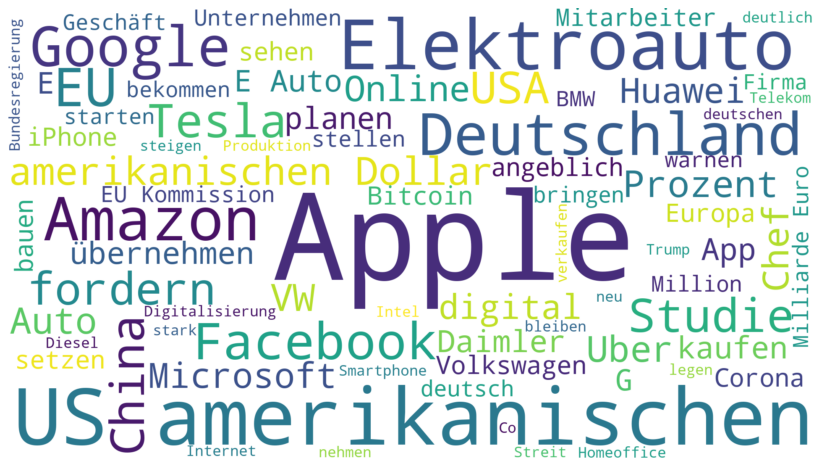

In [63]:
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(headings_clean_lemmas)

plt.figure(figsize=(13, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
heading_words_list = headings_clean_lemmas.split() 
heading_words_df = pd.DataFrame(heading_words_list,columns=['words'])
df = heading_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
sorted_df.head(15)

number_words
words                          
Apple                       871
US-amerikanischen           659
EU                          522
E                           506
Amazon                      416
Auto                        386
Deutschland                 366
Milliarde                   364
Elektroautos                354
Million                     349
Google                      322
Chef                        309
Dollar                      299
Tesla                       282
Euro                        272

<Figure size 2500x1500 with 0 Axes>

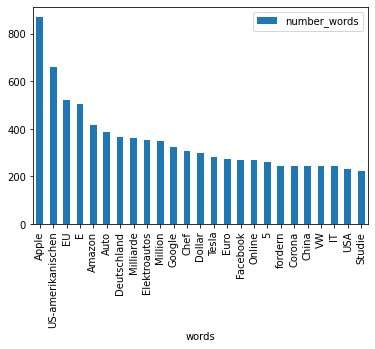

In [57]:
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()

# lead

Ein Lead ist im Schnitt 21 Wörter lang. Der längste Lead umfasst 47 Wörter. Die häufigsten Wörter sind ähnlich zu denen der Überschriften, allerdings verdrängen die Wörter Deutschland und Unternehmen, die Wörter Apple und EU von den ersten Plätzen. Die häufigsten Lemmas unterscheiden sich ebenfalls nur gering von den häufigsten Wörtern.

In [59]:
leads = [article["lead"] for article in articles]
leads_concat = ' '.join(leads)

In [61]:
# remove stopwords, and numbers, and anything that's not alphanumeric or underscore
leads_tokens = nltk.word_tokenize(leads_concat)
leads_clean = " ".join([w for w in leads_tokens if not w.lower() in STOP_WORDS])
leads_clean = re.sub(r'[^\w]', ' ', leads_clean)
#leads_clean = re.sub(r'[0-9]+', '', leads_clean)

## Durchschnittliche Länge

Durschnittliche Länge der Leads: 21.05964345976084
Längster Lead: 47
Kürzester Lead: 6


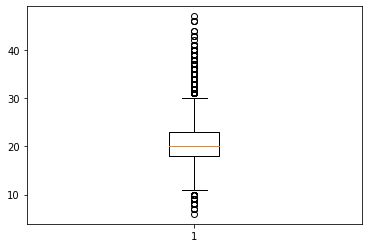

In [65]:
lead_lens = []
for lead in leads:
    lead_len = len(lead.split())
    lead_lens.append(lead_len)
    
print('Durschnittliche Länge der Leads:',np.mean(lead_lens))
print('Längster Lead:',np.max(lead_lens))
print('Kürzester Lead:',np.min(lead_lens))
plt.boxplot(lead_lens)
plt.show()

## Häufigste Wörter

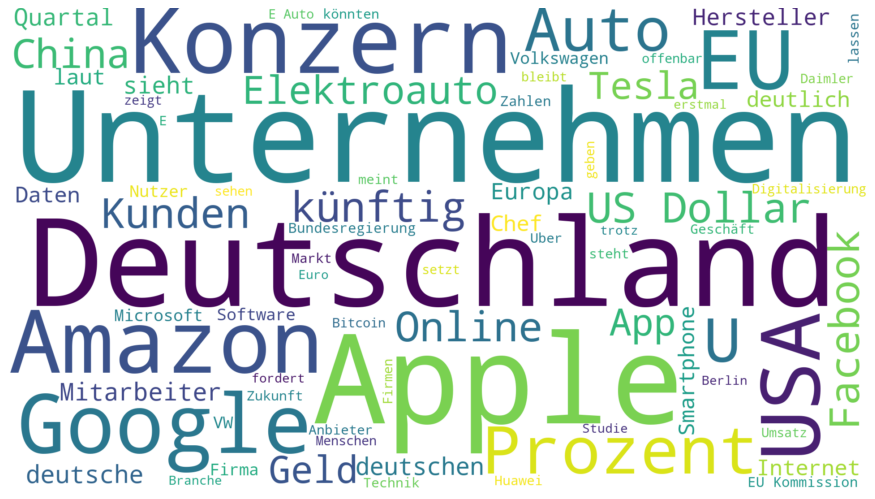

In [76]:
STOPWORDS.update(STOP_WORDS)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(leads_clean)

plt.figure(figsize=(18, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
lead_words_list = leads_clean.split() 
lead_words_df = pd.DataFrame(lead_words_list,columns=['words'])
df = lead_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
sorted_df.head(15)

number_words
words                    
US                   1203
Unternehmen           738
Deutschland           652
Apple                 647
EU                    616
Konzern               518
E                     501
Prozent               472
Amazon                447
Millionen             423
USA                   405
Euro                  400
Dollar                391
Google                387
Online                375

<Figure size 2500x1500 with 0 Axes>

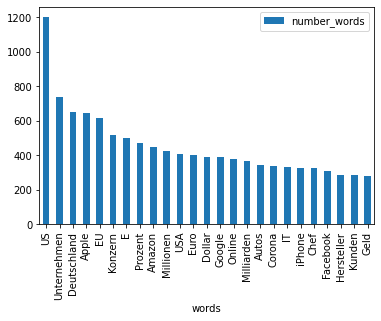

In [78]:
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()

## Häufigste Lemmas

In [79]:
nlp.max_length = 1628578

In [80]:
leads_clean_spacy = nlp(leads_clean)
leads_clean_lemmas = " ".join([token.lemma_ for token in leads_clean_spacy])

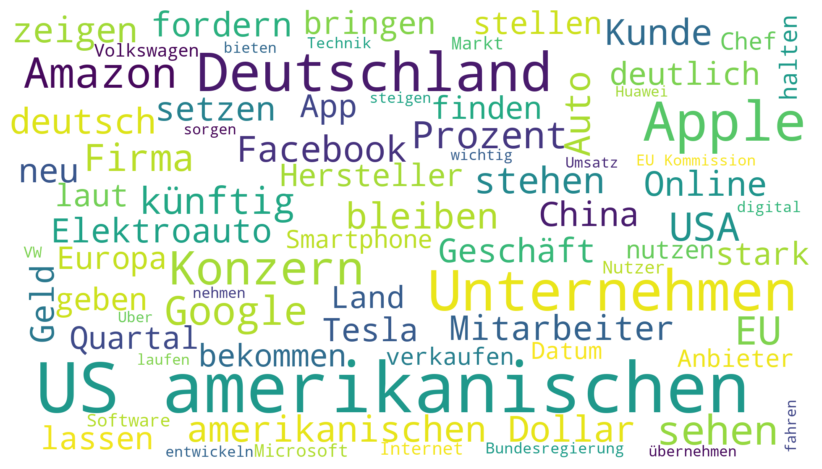

In [81]:
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(leads_clean_lemmas)

plt.figure(figsize=(13, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [82]:
leads_words_list = leads_clean_lemmas.split() 
leads_words_df = pd.DataFrame(leads_words_list,columns=['words'])
df = leads_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
sorted_df.head(15)

number_words
words                          
US-amerikanischen          1203
Unternehmen                 798
Deutschland                 702
Konzern                     690
Apple                       647
EU                          616
Auto                        501
E                           501
Prozent                     473
deutsch                     460
Million                     458
Amazon                      447
Milliarde                   421
USA                         405
Euro                        402

<Figure size 2500x1500 with 0 Axes>

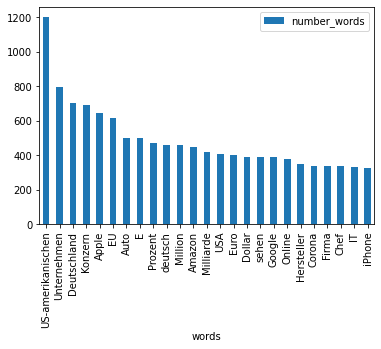

In [74]:
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()

# Text
Texte sind durchschnittlich 350 Zeichen lang. Der längste Text erstreckt sich über 7558 Zeichen. Genau ein Text umfasst 0 Zeichen, da im Artikel span-Tags statt der üblichen p-Tags verwendet wurden. Die häufigsten Wörter sind Prozent, Unternehmen und Euro.

In [85]:
texts = [article["atricle_text"] for article in articles]
texts_concat = ' '.join(texts)

In [86]:
# remove stopwords, and numbers, and anything that's not alphanumeric or underscore
texts_tokens = nltk.word_tokenize(texts_concat)
texts_clean = " ".join([w for w in texts_tokens if not w.lower() in STOP_WORDS])
texts_clean = re.sub(r'[^\w]', ' ', texts_clean)
texts_clean = re.sub(r'[0-9]+', '', texts_clean)

## Durchschnittliche Länge

Durschnittliche Länge der Texte: 349.9044824297557
Längster Text: 7558
Kürzester Text: 0


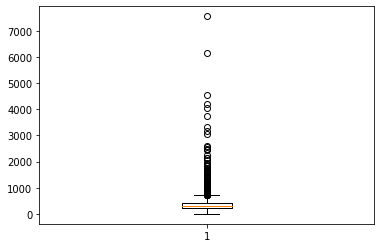

In [87]:
text_lens = []
for text in texts:
    text_len = len(text.split())
    text_lens.append(text_len)
    
print('Durschnittliche Länge der Texte:',np.mean(text_lens))
print('Längster Text:',np.max(text_lens))
print('Kürzester Text:',np.min(text_lens))
plt.boxplot(text_lens)
plt.show()

## Häufigste Wörter

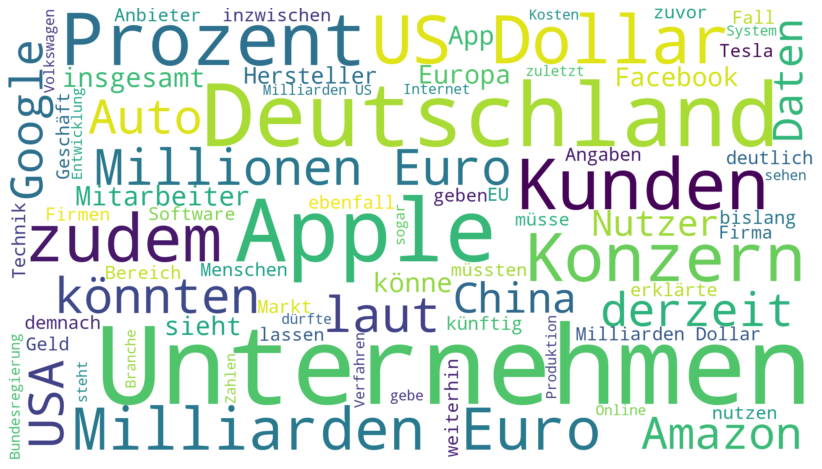

In [88]:
STOPWORDS.update(STOP_WORDS)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(texts_clean)

plt.figure(figsize=(13, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

             number_words
words                    
Prozent             17883
Unternehmen         12415
Euro                11269
US                  10895
Millionen            9688
Apple                8679
Milliarden           8487
Dollar               7784
Deutschland          7710
EU                   5109
Kunden               4900
E                    4720
Konzern              4215
USA                  4202
Google               3811


<Figure size 2500x1500 with 0 Axes>

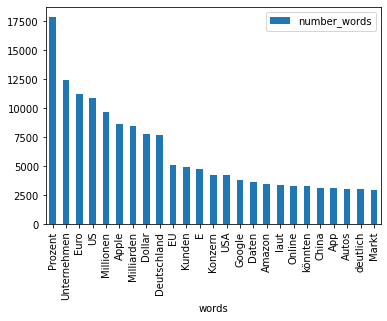

In [89]:
text_words_list = texts_clean.split() 
text_words_df = pd.DataFrame(text_words_list,columns=['words'])
df = text_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
print(sorted_df.head(15))
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()

## Häufigste Lemmas

In [ ]:
nlp.max_length = len(texts_clean)+1

In [ ]:
texts_clean_spacy = nlp(texts_clean)
texts_clean_lemmas = " ".join([token.lemma_ for token in texts_clean_spacy])

In [ ]:
STOPWORDS.update(STOP_WORDS)
wordcloud = WordCloud(background_color="white",width=1920, height=1080, max_words=75).generate(texts_clean_lemmas)

plt.figure(figsize=(13, 80), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_words_list = texts_clean_lemmas.split() 
text_words_df = pd.DataFrame(text_words_list,columns=['words'])
df = text_words_df.groupby(['words']).size().to_frame().rename(columns={0:"number_words"})
sorted_df = df.sort_values(by='number_words',ascending=False)
print(sorted_df.head(15))
plt.figure(figsize=(25, 15), dpi=100)
sorted_df.head(25).plot.bar()
plt.show()